In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
import networkx as nx

data = pd.read_csv('/home/takakin/test/data/data_2018to2019.csv')

# %%
# 「農地以外」を除外し、インデックスをリセット
data = data[data['Crop'] != '農地以外'].reset_index(drop=True)

# 作付品目をワンホットエンコーディング
crop_dummies = pd.get_dummies(data['Crop'], prefix='作付')
data = pd.concat([data, crop_dummies], axis=1)
data

# 緯度経度を配列に変換
location = data[['lati', 'long']].values

# 全ての圃場間の距離を計算
distances = cdist(location, location, metric='euclidean')
distances


# 最大距離を設定 
distance_threshold = 0.001

graphs_vis = []

# グラフを作成
for i, row1 in data.iterrows():
    G = nx.Graph()
    field_id = i
    
    # 中心圃場のノード作成
    G.add_node(field_id, pos=(row1['lati'], row1['long']))

    for j, row2 in data.iterrows():
        if i != j:
            distance = distances[i, j]
            # ノードとエッジを追加
            if distance <= distance_threshold:
                G.add_node(j, pos=(row2['lati'], row2['long'])) 
                G.add_edge(field_id, j)
    
    # グラフをリストに追加
    graphs_vis.append(G)

# グラフの数を確認
num_graphs = len(graphs_vis)
print(f"作成したグラフの数: {num_graphs}")


作成したグラフの数: 987


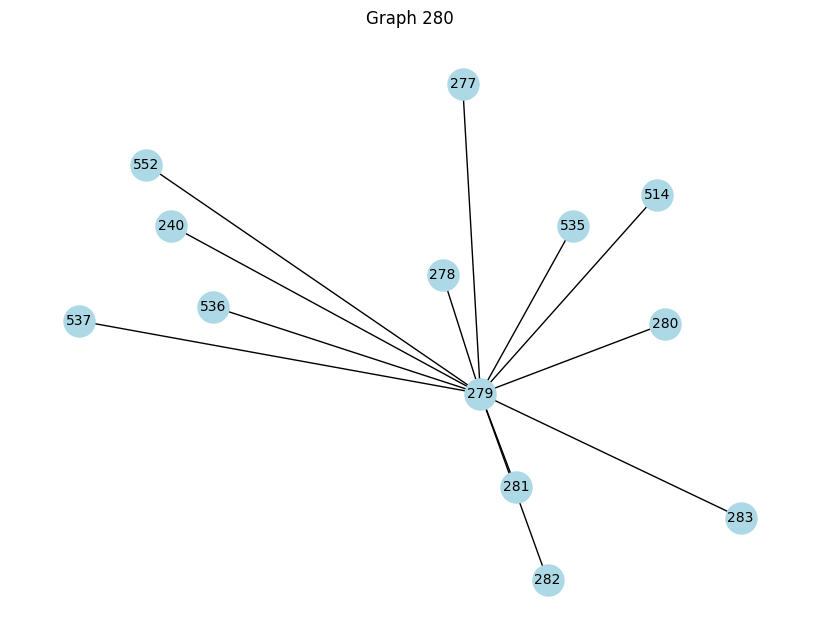

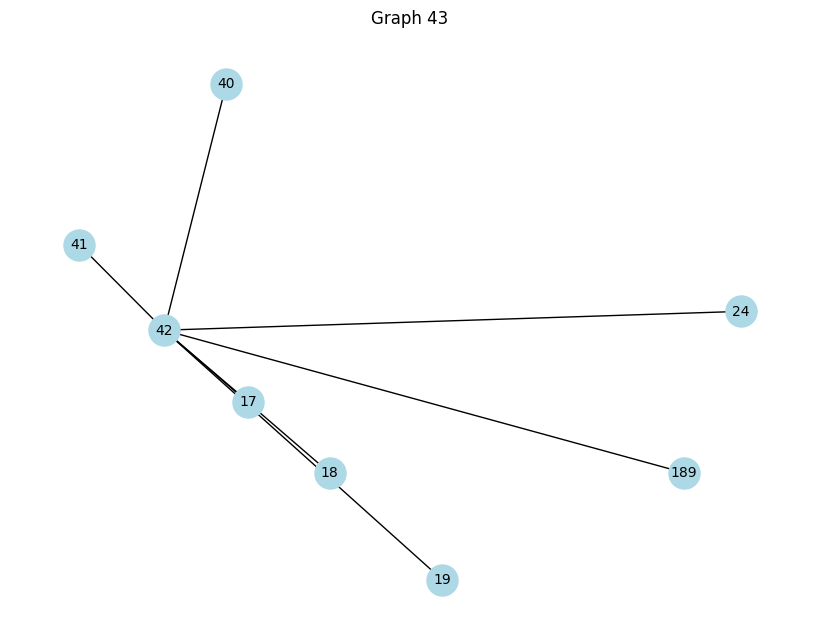

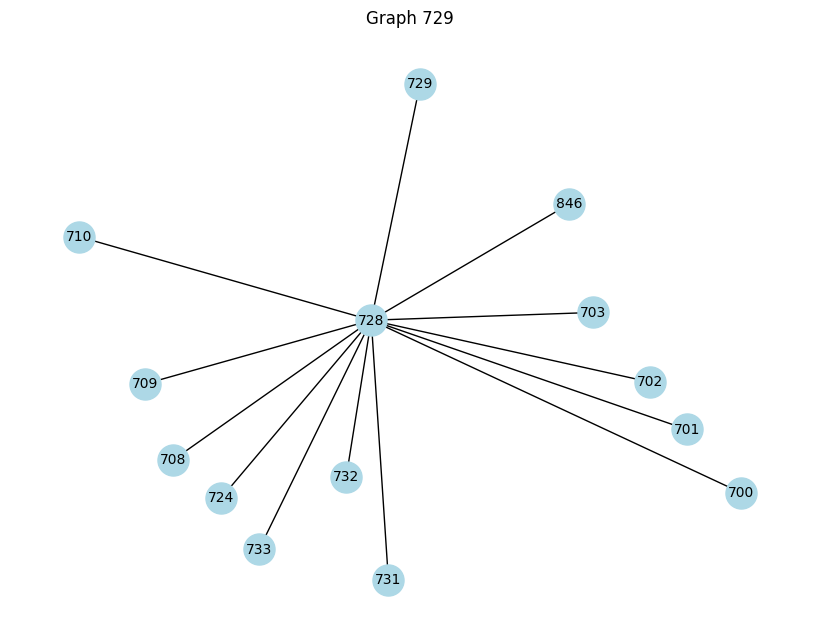

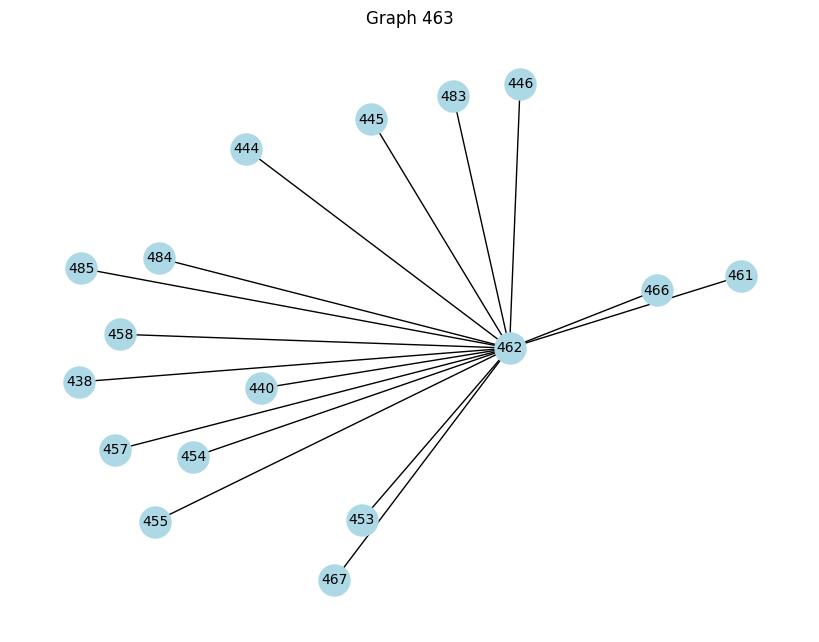

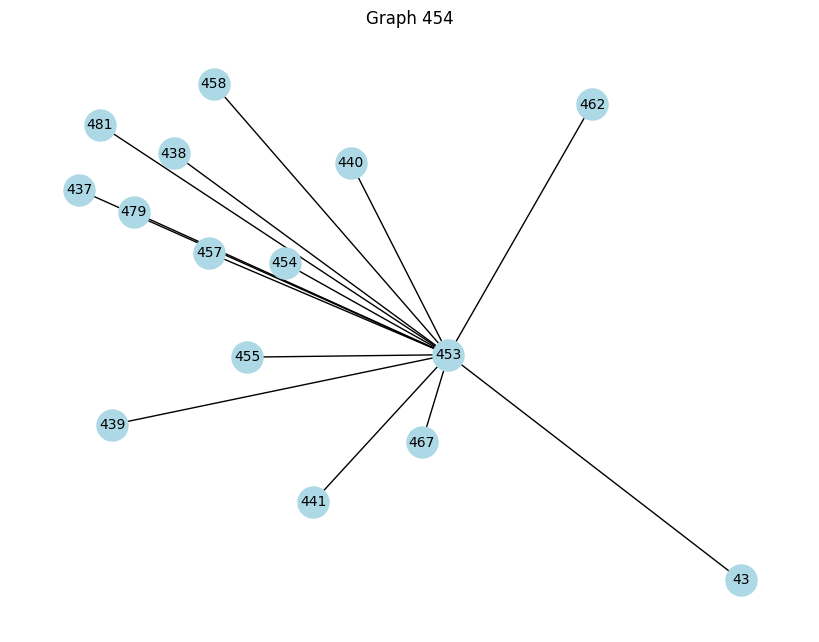

In [5]:
# グラフの図示
# # 確認したいグラフの数を指定
num_to_display = 5  # 確認したいグラフの数

# ランダムにグラフを選ぶ
selected_indices = random.sample(range(num_graphs), num_to_display)

# 選ばれたグラフの図を描画
for idx in selected_indices:
    # ノードの特徴量をグラフから取得
    G = graphs_vis[idx]
          
    plt.figure(figsize=(8, 6))
    pos = nx.get_node_attributes(G, 'pos')  # ノードの位置を取得
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
       
    plt.title(f"Graph {idx + 1}")
    plt.show()